In [1]:
#NB: Kaggle requires phone verification to use the internet or a GPU. If you haven't done that yet, the cell below will fail
#    This code is only here to check that your internet is enabled. It doesn't do anything else.
#    Here's a help thread on getting your phone number verified: https://www.kaggle.com/product-feedback/135367

import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

In [2]:
# It's a good idea to ensure you're running the latest version of any libraries you need.
# `!pip install -Uqq <libraries>` upgrades to the latest version of <libraries>
# NB: You can safely ignore any warnings or errors pip spits out about running as root or incompatibilities
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai 'duckduckgo_search>=6.2'

In [3]:
from duckduckgo_search import DDGS #DuckDuckGo has changed the api so we need to update 
from fastcore.all import *

def search_images(keywords, max_images=200):
    return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')
import time, json

In [5]:
# install into THIS kernel:
#import sys
#!"{sys.executable}" -m pip install -U ddgs

from ddgs import DDGS
import time, random

def ddgs_image_urls(query, max_images=1, safesearch="moderate", attempts=6):
    delay = 1.0
    for t in range(attempts):
        try:
            with DDGS() as ddgs:
                # ddgs API uses 'query='
                results = ddgs.images(query=query, max_results=max_images, safesearch=safesearch)
                return [r["image"] for r in results]
        except Exception as e:
            if "Ratelimit" in str(e) and t < attempts-1:
                time.sleep(delay + random.random())
                delay *= 2
            else:
                raise

urls = ddgs_image_urls("bird photos", max_images=1)
print(urls[0])

https://images.pexels.com/photos/326900/pexels-photo-326900.jpeg?cs=srgb&dl=wood-flight-bird-326900.jpg&fm=jpg


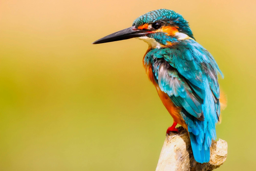

In [7]:
from fastdownload import download_url
dest = 'bird.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

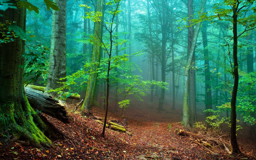

In [8]:
download_url(search_images('forest photos', max_images=1)[0], 'forest.jpg', show_progress=False)
Image.open('forest.jpg').to_thumb(256,256)

In [9]:
searches = 'forest','bird'
path = Path('bird_or_not')

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    time.sleep(5)
    resize_images(path/o, max_size=400, dest=path/o)

/Users/muhammadimran/miniforge3/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=28760) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/Users/muhammadimran/miniforge3/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=28760) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/Users/muhammadimran/miniforge3/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=28760) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/Users/muhammadimran/miniforge3/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=28760) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/Users/muhammadimran/miniforge3/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=28760) is

In [10]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

/Users/muhammadimran/miniforge3/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=28760) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/Users/muhammadimran/miniforge3/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=28760) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/Users/muhammadimran/miniforge3/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=28760) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/Users/muhammadimran/miniforge3/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=28760) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/Users/muhammadimran/miniforge3/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=28760) is

0

/Users/muhammadimran/miniforge3/lib/python3.12/site-packages/matplotlib/cbook.py:684: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(x, subok=True, copy=copy)
/Users/muhammadimran/miniforge3/lib/python3.12/site-packages/matplotlib/cbook.py:684: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(x, subok=True, copy=copy)
/Users/muhammadimran/miniforge3/lib/python3.12/site-packages/matplotlib/cbook.py:684: DeprecationWarning: __array__ implementation doesn

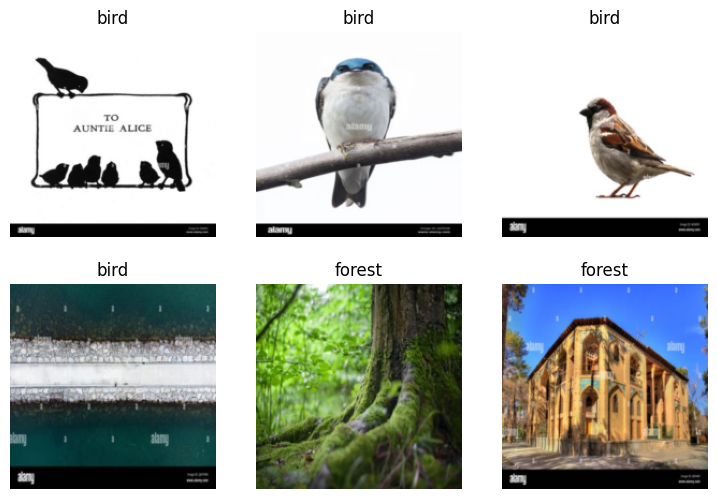

In [11]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [12]:
blocks=(ImageBlock, CategoryBlock),

In [13]:
get_items=get_image_files, 

In [14]:
splitter=RandomSplitter(valid_pct=0.2, seed=42),

In [15]:
get_y=parent_label,

In [16]:
item_tfms=[Resize(192, method='squish')]

In [17]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.853113,0.653128,0.121951,00:03


epoch,train_loss,valid_loss,error_rate,time
0,0.165670,0.193134,0.048780,00:07
1,0.095932,0.180449,0.073171,00:06
2,0.065874,0.159569,0.073171,00:06


In [18]:
is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: bird.
Probability it's a bird: 1.0000


In [19]:
is_bird

'bird'